<a href="https://colab.research.google.com/github/DButmeh/Adult-income-dataset/blob/main/Adult-income%20%20Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult income dataset

##Dina Al Botmeh
---------------------------------------------------------------------------------

#The task is to build a model that helps in predicting income level based on the individual’s personal information.

------------------------------------------

# ⭐️ **Project 4 - Part 2(Core)**
>[Click here](#new20) to jump to assignment's solution.

# ⭐️ **About Dataset:**
>[Click here](#new9) to jump to assignment's solution.

<a name='new0'></a>
# ⭐️ **Prepare/clean the data:**
>[Click here](#new1) to jump to assignment's solution.


# ⭐️ **Preprocess data**
>[Click here](#new3) to jump to assignment's solution.



# ⭐️**Fit and evaluate a default random forest model**
>[Click here](#new7) to jump to assignment's solution.


#  ⭐️ **Apply sklearn's permutation importance and visualize the permutation importances ,Compare it with previous model**
>[Click here](#new10) to jump to assignment's solution.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

####  **Functions for EDA** Functions for EDA inspection REG & CLASS target
>[Click here](#newc) to jump to EDA .

 ####  **Functions for EDA**: Evaluation Classification
>[Click here](#newf) to jump to EDA .

 #### **Functions for EDA** Feature Importances
>[Click here](#newB) to jump to EDA .

 ####  **Functions for**  plot  importances
>[Click here](#newA) to jump to EDA .

---------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

<a name='newc'></a>
## ⭐️**Functions for EDA** inspection REG & CLASS target
>[Click here](#new0) to jump to up .

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC & CATEGORICAL TARGET.. aproved"""
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    #add Bar label
    for container in ax.containers:
     ax.bar_label(container ,label_type='center', rotation=90, color='white',)

    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)

  # CLASSIFICATION-TARGET PLOT # This is the code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
   #add Bar label
    for container in ax.containers:
     ax.bar_label(container ,label_type='center', rotation=90, color='white',)

  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # add bar label
    for container in ax.containers:
     ax.bar_label(container ,label_type='center', rotation=90, color='white',)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

<a name='newf'></a>
# ⭐️**Functions for EDA** Evaluation Classification
>[Click here](#new0) to jump to up .

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

<a name='newB'></a>
###⭐️**Functions for EDA** Feature Importances
>[Click here](#new0) to jump up.

In [ ]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

<a name='newA'></a>
###⭐️**Functions for**  plot  importances
>[Click here](#new0) to jump up.

In [ ]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax



In [ ]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)


    ## return ax in case want to continue to update/modify figure
    return ax


#load data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns',100)

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="ticks", color_codes=True)
from types import FrameType
from pickle import FRAME
from typing import Pattern

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay,
                             classification_report )
# setting random state for reproducibility
SEED = 321
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

<a name='new9'></a>
## ⭐️**About Dataset**
>[Click here](#new0) to jump to up .

Attribute Information
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,  State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

In [ ]:
# Load data from folder structure
fpath =("/content/drive/MyDrive/week 9study/adult.csv")
# Read in the data
df =pd.read_csv(fpath)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<a name='new1'></a>
# ⭐️**Prepare/clean the data:**
>[Click here](#new0) to jump to up .

In [ ]:
# Check for duplicates
df.duplicated().sum()

52

In [ ]:
# Remove duplicates rows based on all columns and reset the index
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## **Check for missing values**

In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#Check for and address any inconsistent values in categorical columns.

In [ ]:
# Remake the list of string columns
string_cols = df.select_dtypes('object').columns

# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(df[col].value_counts(dropna = False))
  # Print an empty line for readability
  print()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial   

#There is lot off missing data filled with ?
- replace it direct to missing

In [ ]:
df.replace(' ?', "Missing", inplace=True)

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# There is no  impossible values

 <a name='new3'></a>
# ⭐️**Preprocess data**
>[Click here](#new0) to jump to up .

In [ ]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['income'].value_counts(normalize = True)

income
<=50K    0.760586
>50K     0.239414
Name: proportion, dtype: float64

###The data set is  imbalanced <=50K=76% while>50K =0.24%.
-  so we will aim to achieve the best results for each in terms of recall

##Separate the data.

In [ ]:
# Create features matrix and target vector
X = df.drop(columns = ['income'])
y = df['income']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,stratify=y)

#Categorical Preprocessing Pipeline

In [ ]:
# Create the preprocessing pipeline for categorical data
# (New) Select columns wiht make_column)selector
cat_selector=make_column_selector(dtype_include="object")
# Insantiate transfomers
ohe=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
# Insantiate transfomers
cat_pipe=make_pipeline(ohe)
# Make a tuple for column transformer
cat_tuple=("categorical",cat_pipe,cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7bfcaaabeb30>)

# Numeric reprocessing Pipeline

In [ ]:
# (New) Select columns wiht make_column)selector
num_selector=make_column_selector(dtype_include="number")
#Instantiate the transformers
scaler = StandardScaler()
# Make the tuple for ColumnTransformer
num_tuple=('numeric',scaler,num_selector)
num_tuple

('numeric',
 StandardScaler(),
 <sklearn.compose._column_transformer.make_column_selector at 0x7bfcaaabedd0>)

#Create Preprocessor


In [ ]:
preprocessor = ColumnTransformer([num_tuple,cat_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bfcaaabedd0>),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bfcaaabeb30>)],
                  verbose_feature_names_out=False)

 <a name='new7'></a>
# ⭐️**Fit and evaluate a default random forest model**
>[Click here](#new0) to jump to up

In [ ]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)
X_test_tf.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
29767,0.609788,0.412138,1.528774,3.514834,-0.218614,1.580718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9530,1.048148,0.235944,0.359816,-0.144405,4.720224,-0.032712,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44600,0.609788,2.183957,1.139121,-0.144405,-0.218614,-0.032712,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#a)default RandomForestClassifier model

In [ ]:
plt.style.use("default")

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27831
        >50K       1.00      1.00      1.00      8761

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



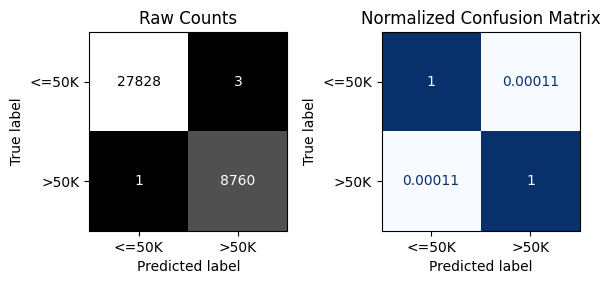


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9278
        >50K       0.73      0.62      0.67      2920

    accuracy                           0.85     12198
   macro avg       0.81      0.77      0.79     12198
weighted avg       0.85      0.85      0.85     12198



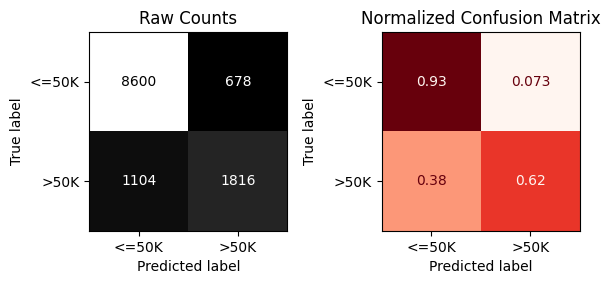

In [ ]:
# Make an instance of the model with default parameters
rf= RandomForestClassifier(random_state = 42)
# Fit the model  on the X_train_tf .and y train
rf.fit(X_train_tf, y_train)
# Use custom function to evaluate default model
evaluate_classification(rf, X_train_tf, y_train, X_test_tf, y_test)

In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf, X_train_tf, y_train,n_repeats =5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
perm_importances2 = pd.Series(r['importances_mean'],index=X_train_tf.columns,
                           name = 'permutation importance')
perm_importances2=perm_importances2.sort_values(ascending=False)


---------------------------------------------------------
<a name='new20'></a>
#⭐️ **Project 4 - Part 2 (Core)**
>[Click here](#new0) to jump to up .

- Apply PCA to get 3 principal components for the data.

In [ ]:
# Fit & transform data.
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf =preprocessor.transform(X_test)

In [ ]:
#scale X_train to scale Categorical
scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [ ]:
# Define PCA to address 3 of the variance
pca= PCA(n_components=3)
# fit and transform on training data
X_train_pca = pca.fit_transform(X_train_tf)
# transform test data
X_test_pca = pca.transform(X_test_tf)


- Apply clustering, select the appropriate number of clusters

In [ ]:
plt.style.use(('ggplot','tableau-colorblind10'))

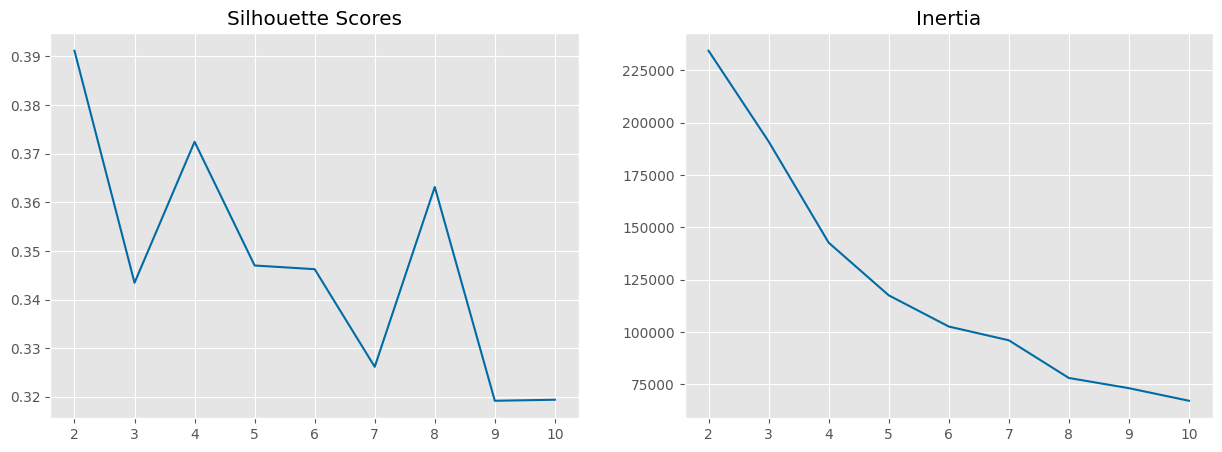

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42 )
  kmeans.fit(X_train_pca)
  sils.append(silhouette_score(X_train_pca, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(X_train_pca)
# Predict the clusters for the test data
kmeans.predict(X_test_pca)

array([2, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
y_train_pca = kmeans.labels_
y_test_pca = kmeans.predict(X_test_pca)

In [ ]:
# Concatenate cluster assignments
all_clusters = np.concatenate((y_train_pca, y_test_pca))

# Add cluster assignments as a new column
df["cluster"] = all_clusters
df2=df.copy().drop(columns='income')
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,cluster
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11942
           1       1.00      1.00      1.00     14152
           2       1.00      1.00      1.00      7970
           3       1.00      1.00      1.00      2528

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



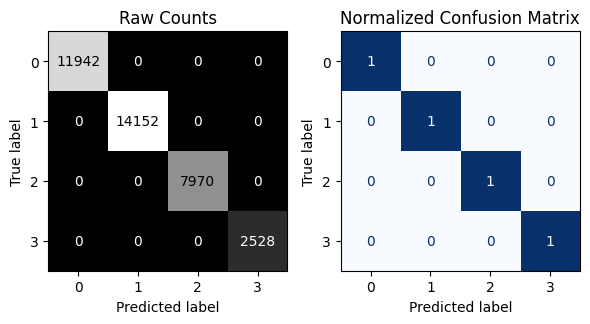


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3999
           1       0.99      0.99      0.99      4726
           2       0.96      0.96      0.96      2630
           3       0.98      0.91      0.94       843

    accuracy                           0.97     12198
   macro avg       0.97      0.96      0.96     12198
weighted avg       0.97      0.97      0.97     12198



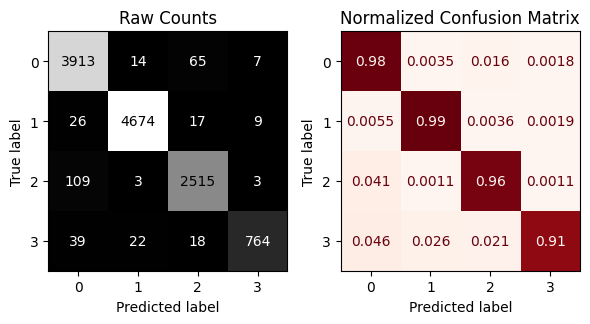

In [ ]:
plt.style.use("default")
# Make an instance of the model with default parameters
rf= RandomForestClassifier(random_state = 42)
# Fit the model  on the X_train_tf .and y train
rf.fit(X_train_tf, y_train_pca)
# Use custom function to evaluate default model
evaluate_classification(rf, X_train_tf, y_train_pca, X_test_tf, y_test_pca)

#the data is imbaleced that for the comparing wil be with moaro-f1-score.
#The model performance with engineering and without  is the same for the traing set = over fitting for both
# The  performance with engineering is better than  without  .where moaro-f1-score = 96% for th testing data for all clusters(target )whihe without engineering the model performes moaro-f1-score = 79%

#Wrapper Method-Using  Forward Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Instantiate the SequentialFeatureSelector
sk_sfs = SequentialFeatureSelector(dt, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sk_sfs.fit(X_train_tf,y_train_pca)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

 # Filter the training and test data based on the selector

In [ ]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sk_sfs.support_
# Only include the features selected
X_train_10 = X_train_tf.loc[:,features_to_keep]
X_test_10 = X_test_tf.loc[:,features_to_keep]
X_train_10.shape

(36592, 10)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11942
           1       0.98      0.99      0.98     14152
           2       0.91      0.92      0.92      7970
           3       0.95      0.87      0.91      2528

    accuracy                           0.95     36592
   macro avg       0.94      0.93      0.94     36592
weighted avg       0.95      0.95      0.95     36592



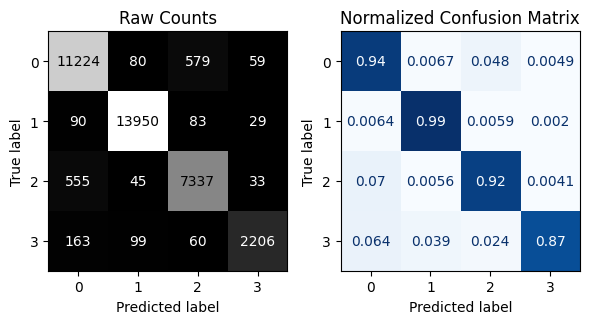


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3999
           1       0.98      0.98      0.98      4726
           2       0.91      0.91      0.91      2630
           3       0.93      0.87      0.90       843

    accuracy                           0.95     12198
   macro avg       0.94      0.93      0.93     12198
weighted avg       0.95      0.95      0.95     12198



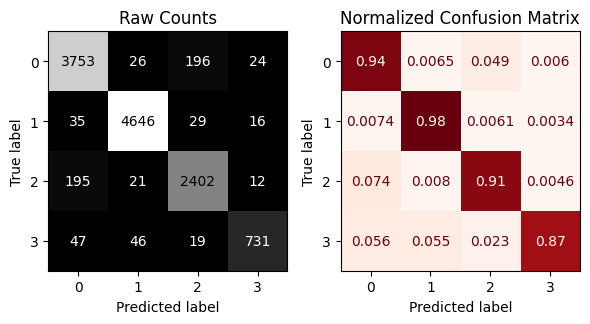

In [ ]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 5 selected featuers
rf_clf.fit(X_train_10, y_train_pca)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_10, y_train_pca, X_test_10, y_test_pca)

# With only 7 features, the performance of the model is still better than without feature engineering, though slightly less than the performance with feature engineering, where the macro-F1 score decreases from 96% to 86%

 <a name='new10'></a>
# ⭐️ **Apply sklearn's permutation importance and visualize the permutation , Compare it with previous model**
>[Click here](#new0) to jump up.


In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf_clf, X_train_10, y_train_pca,n_repeats =5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_10.columns,
                           name = 'permutation importance')
perm_importances=perm_importances.sort_values(ascending=False)


#default RandomForestClassifier model

In [ ]:
plt.style.use(('ggplot','tableau-colorblind10'))

In [ ]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict



In [ ]:
colors_top7 = get_color_dict(perm_importances2, top_n=7)

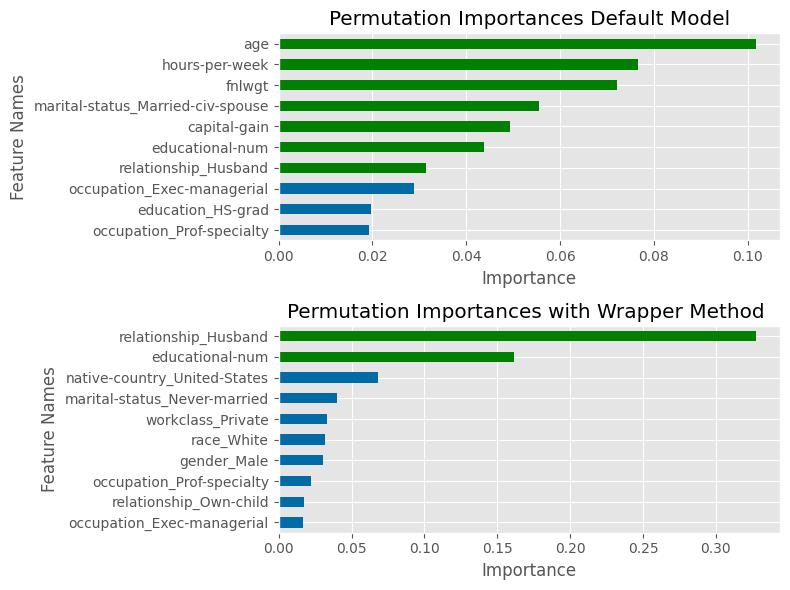

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(40,15))
n =10 # setting the # of features to use for both subplots
plot_importance_color_ax(perm_importances2, top_n=n, ax=axes[0],color_dict=colors_top7)

plot_importance_color_ax(perm_importances, top_n=n, ax=axes[1],color_dict=colors_top7)

axes[1].set(title='Permutation Importances with Wrapper Method ', )
axes[0].set(title='Permutation Importances Default Model')
fig.tight_layout()

#Only two features from the top 7 in the Permutation Importances of the Default Model remained in the top 7 of the Permutation Importances with the Wrapper Method.
-The feature "relationship_Husband", which was ranked 7th, moved to 1st place.
- The feature "education_num", which was ranked 6th, moved to 2nd place
